In [1]:
# Data Preprocessing

In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Importing the dataset
df = pd.read_csv('flats.csv', sep=';')

In [4]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000
1,1.0,center,repaired,37,used,35000
2,3.0,suburbs,repaired,67,used,65000
3,NaN,suburbs,repaired,21,used,15000
4,1.0,suburbs,repaired,82,NaN,60000
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407
213,3.0,center,unrepaireded,84,new,57678
214,3.0,center,unrepaireded,93,new,63513
215,2.0,center,unrepaireded,72,new,51121


C:\Users\kater\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


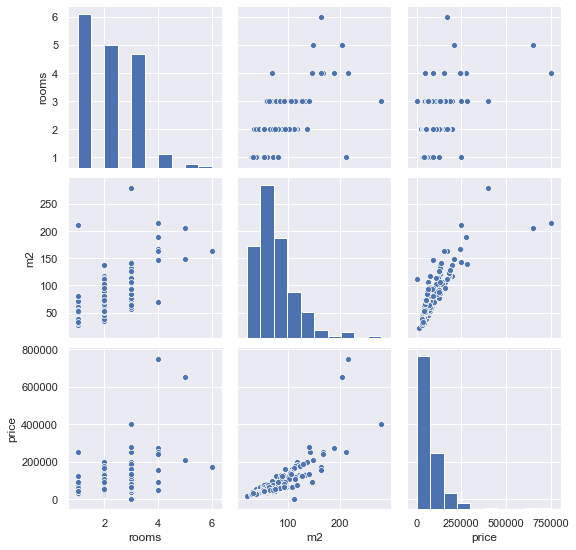

In [24]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

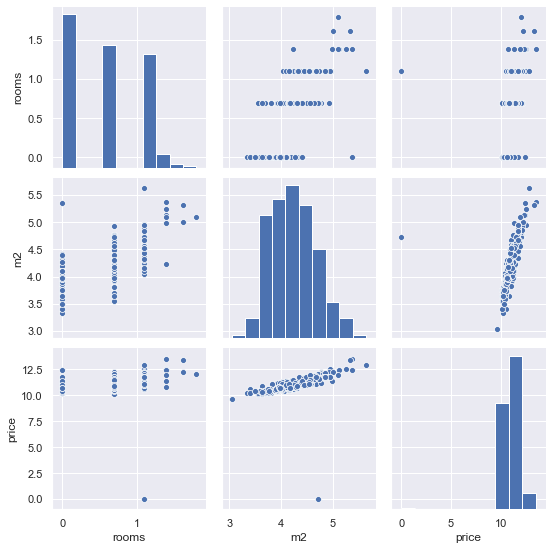

In [25]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['rooms','m2', 'price']] = np.log(df_1[['rooms','m2', 'price']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

In [6]:
df.describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.013889,76.331797,82427.451613
std,0.971593,38.019982,82183.660820
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,6.000000,280.000000,750000.000000


In [7]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [8]:
# Outliers
df = outliers(df)
df.describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.008269,75.638557,78680.609688
std,0.951661,35.256700,59689.357661
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,4.928667,190.391743,328978.434073


In [9]:
df.dtypes

rooms        float64
location      object
condition     object
m2           float64
type          object
price        float64
dtype: object

In [10]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
type,1,0.004608
rooms,1,0.004608
price,0,0.000000
m2,0,0.000000
condition,0,0.000000
location,0,0.000000


In [11]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [12]:
# Function Missing data (non-numeric)
def fill_missing_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:        
        prep_fr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_fr.fit(x[char_var])
        x[char_var] = prep_fr.transform(x[char_var])
    return(x)

In [13]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)
df = fill_missing_char(df)

In [14]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
price,0,0.0
type,0,0.0
m2,0,0.0
condition,0,0.0
location,0,0.0
rooms,0,0.0


In [15]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [16]:
# Encoding categorical data
df = encoding_char(df)

In [17]:
df

,rooms,location,condition,m2,type,price
0,2.000000,0,0,50.0,0,35000.0
1,1.000000,1,0,37.0,0,35000.0
2,3.000000,0,0,67.0,0,65000.0
3,2.008269,0,0,21.0,0,15000.0
4,1.000000,0,0,82.0,1,60000.0
...,...,...,...,...,...,...
212,2.000000,1,1,65.0,1,46407.0
213,3.000000,1,1,84.0,1,57678.0
214,3.000000,1,1,93.0,1,63513.0
215,2.000000,1,1,72.0,1,51121.0


In [18]:
# Descriptive Statistics
df.describe()

,rooms,location,condition,m2,type,price
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2.008269,0.732719,0.774194,75.638557,0.797235,78680.609688
std,0.949455,0.443564,0.419079,35.256700,0.402988,59689.357661
min,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,49.000000,1.000000,39429.000000
50%,2.000000,1.000000,1.000000,67.000000,1.000000,59548.000000
75%,3.000000,1.000000,1.000000,91.000000,1.000000,90000.000000
max,4.928667,1.000000,1.000000,190.391743,1.000000,328978.434073


In [19]:
# Exporting the dataset
df.to_csv('flats_prep.csv', sep=';', index=False)

In [20]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))